In [2]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
from __future__ import division
from math import sqrt
%matplotlib inline
import plotly.graph_objs as go

## 1. Data Cleaning

### 1.1 Remove rows with empty cells

In [4]:
#cleaning data: remove cells with empty strings, replace with null values, and remove all instances with the null values
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.replace(' ', np.nan, inplace = True)
data = data.dropna()

### 1.2 Clean data 

In [5]:
data.replace('No phone service', 'No', inplace = True)
data.replace('No internet service', 'No', inplace = True)

### 1.3 Change attributes to appropriate data types

In [6]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

## 2. Exploratory Data Analysis

In [7]:
"""import plotly.plotly as py"""               
import seaborn as sns
import os                     # For os related operations
import sys                    # For data size

In [8]:
data.head(n=5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Senior citizens attribute is currently either 0 or 1. For easier visualization, we will convert 0 and 1 to 'No' and 'Yes' respectively. 

In [9]:
data['SeniorCitizen'] = data['SeniorCitizen'].map(lambda s :'Yes'  if s == 1 else 'No')

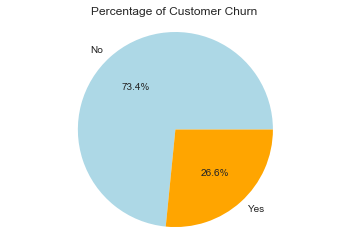

In [539]:
values = data['Churn'].value_counts()
labels = ['No','Yes']
plt.pie(values, labels=labels, colors = ['lightblue', 'orange'], autopct='%1.1f%%')
plt.title("Percentage of Customer Churn")
plt.axis('equal')
plt.show()

### 2.1 Categorical Variables

Text(0,0.5,'Percentage')

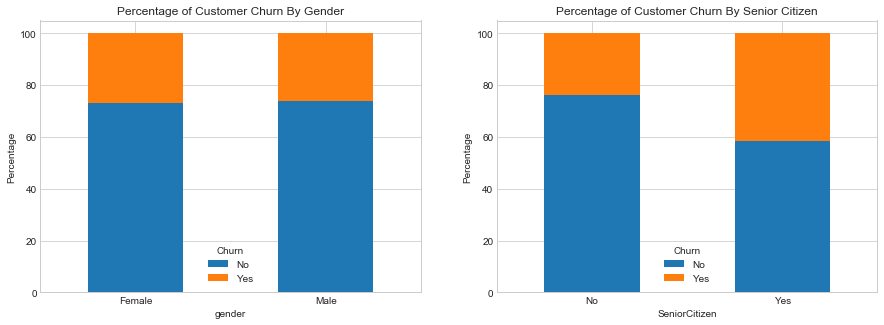

In [357]:
graph1 = (data.groupby(['gender'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(15,5),  rot=0, ax = plt.subplot(1, 2, 1))
plt.title("Percentage of Customer Churn By Gender")
plt.ylabel("Percentage")

graph1 = (data.groupby(['SeniorCitizen'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(15,5),  rot=0, ax = plt.subplot(1, 2, 2))
plt.title("Percentage of Customer Churn By Senior Citizen")
plt.ylabel("Percentage")

Text(0,0.5,'Percentage')

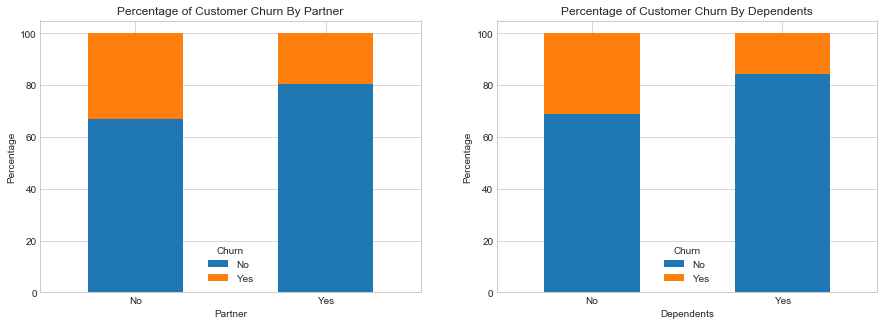

In [358]:
graph1 = (data.groupby(['Partner'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(15,5),  rot=0, ax = plt.subplot(1, 2, 1))
plt.title("Percentage of Customer Churn By Partner")
plt.ylabel("Percentage")

graph1 = (data.groupby(['Dependents'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(15,5),  rot=0, ax = plt.subplot(1, 2, 2))
plt.title("Percentage of Customer Churn By Dependents")
plt.ylabel("Percentage")

Text(0,0.5,'Percentage')

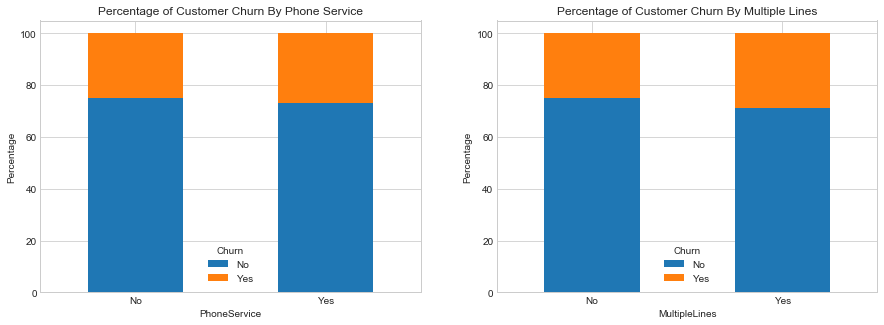

In [359]:
graph1 = (data.groupby(['PhoneService'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(15,5),  rot=0, ax = plt.subplot(1, 2, 1))
plt.title("Percentage of Customer Churn By Phone Service")
plt.ylabel("Percentage")

graph1 = (data.groupby(['MultipleLines'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(15,5),  rot=0, ax = plt.subplot(1, 2, 2))
plt.title("Percentage of Customer Churn By Multiple Lines")
plt.ylabel("Percentage")

Text(0,0.5,'Percentage')

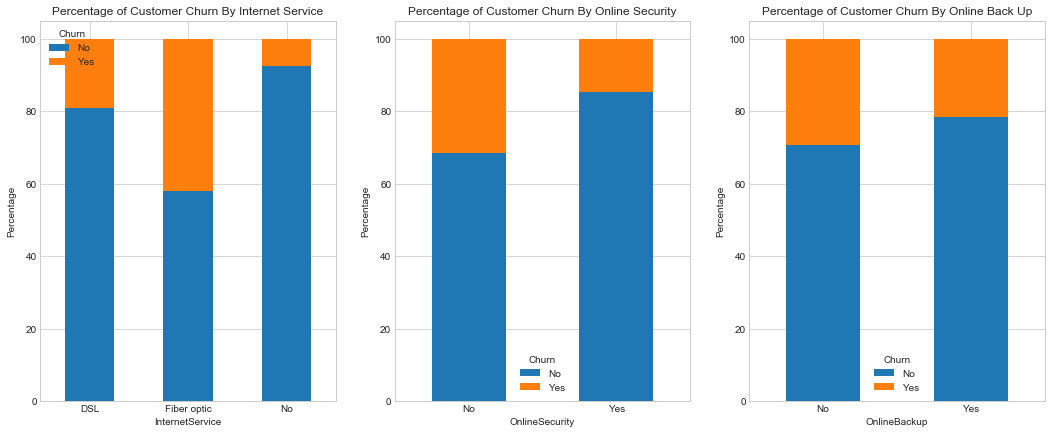

In [360]:
graph1 = (data.groupby(['InternetService'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(18, 7),  rot=0, ax = plt.subplot(1, 3, 1))
plt.title("Percentage of Customer Churn By Internet Service")
plt.ylabel("Percentage")

graph1 = (data.groupby(['OnlineSecurity'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(18, 7),  rot=0, ax = plt.subplot(1, 3, 2))
plt.title("Percentage of Customer Churn By Online Security")
plt.ylabel("Percentage")

graph1 = (data.groupby(['OnlineBackup'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(18, 7),  rot=0, ax = plt.subplot(1, 3, 3))
plt.title("Percentage of Customer Churn By Online Back Up")
plt.ylabel("Percentage")

Text(0,0.5,'Percentage')

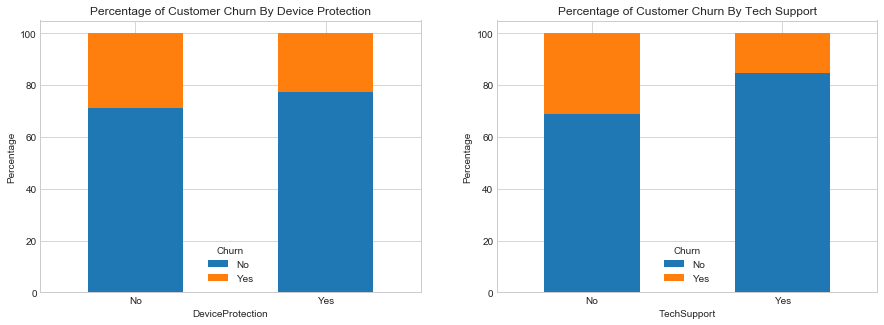

In [361]:
graph1 = (data.groupby(['DeviceProtection'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(15, 5),  rot=0, ax = plt.subplot(1, 2, 1))
plt.title("Percentage of Customer Churn By Device Protection")
plt.ylabel("Percentage")

graph1 = (data.groupby(['TechSupport'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(15, 5),  rot=0, ax = plt.subplot(1, 2, 2))
plt.title("Percentage of Customer Churn By Tech Support")
plt.ylabel("Percentage")


Text(0,0.5,'Percentage')

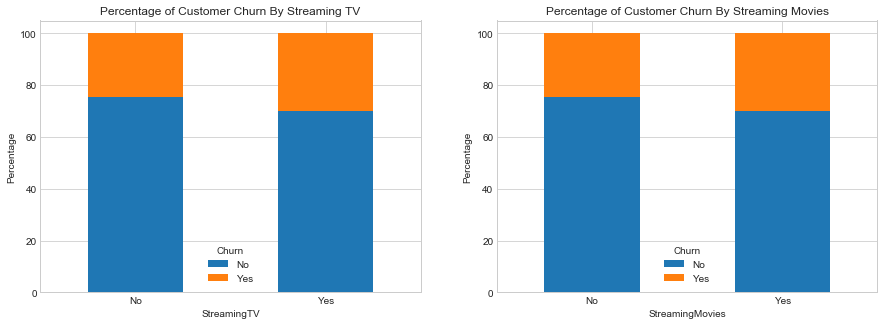

In [362]:
graph1 = (data.groupby(['StreamingTV'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(15, 5),  rot=0, ax = plt.subplot(1, 2, 1))
plt.title("Percentage of Customer Churn By Streaming TV")
plt.ylabel("Percentage")

graph1 = (data.groupby(['StreamingMovies'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(15, 5),  rot=0, ax = plt.subplot(1, 2, 2))
plt.title("Percentage of Customer Churn By Streaming Movies")
plt.ylabel("Percentage")


Text(0,0.5,'Percentage')

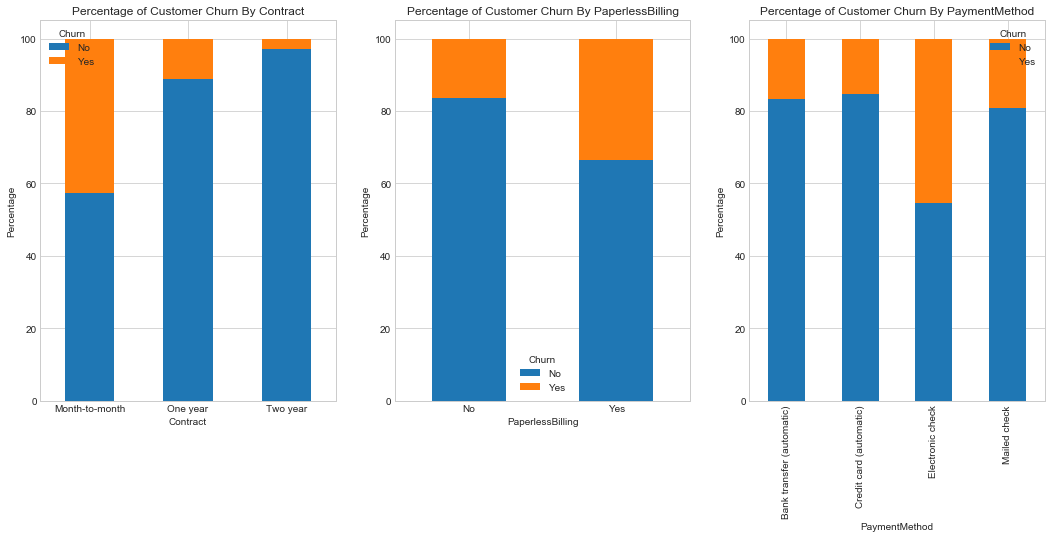

In [363]:
graph1 = (data.groupby(['Contract'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(18, 7),  rot=0, ax = plt.subplot(1, 3, 1))
plt.title("Percentage of Customer Churn By Contract")
plt.ylabel("Percentage")

graph1 = (data.groupby(['PaperlessBilling'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(18, 7),  rot=0, ax = plt.subplot(1, 3, 2))
plt.title("Percentage of Customer Churn By PaperlessBilling")
plt.ylabel("Percentage")

graph1 = (data.groupby(['PaymentMethod'])['Churn'].value_counts(normalize=True)*100).unstack().plot(kind="bar", stacked=True, figsize=(18, 7), ax = plt.subplot(1, 3, 3))
plt.title("Percentage of Customer Churn By PaymentMethod")
plt.ylabel("Percentage")

### 2.2 Continuous Variables

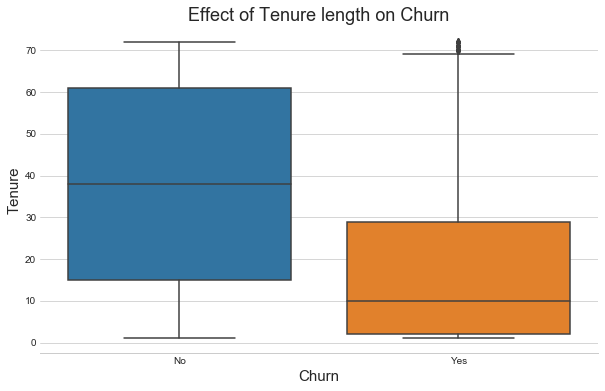

In [364]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Churn', y = 'tenure', data=data)
ax.set_title('Effect of Tenure length on Churn', fontsize=18)
ax.set_ylabel('Tenure', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
sns.despine(left=True)

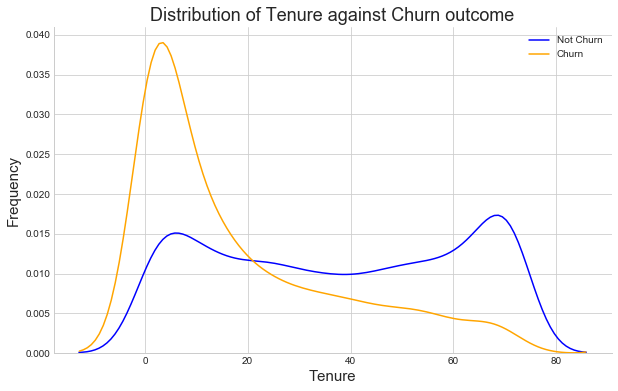

In [365]:
plt.figure(figsize=(10,6))
g = sns.kdeplot(data.tenure[(data["Churn"] == 'No') ], color="Blue")
g = sns.kdeplot(data.tenure[(data["Churn"] == 'Yes') ], ax =g, color="Orange")
g.set_xlabel("Tenure", fontsize = 15)
g.set_ylabel("Frequency", fontsize = 15)
plt.title('Distribution of Tenure against Churn outcome', fontsize=18)
g = g.legend(["Not Churn","Churn"])
sns.despine(left=False)

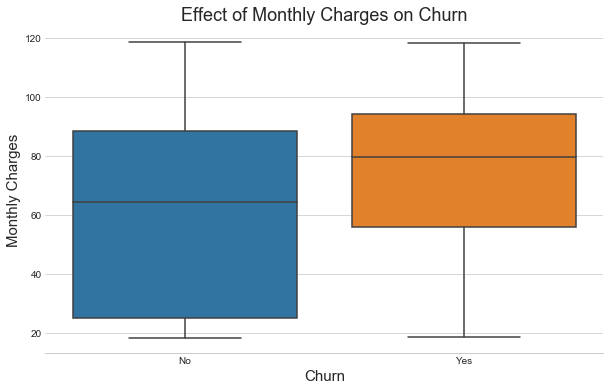

In [366]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Churn', y = 'MonthlyCharges', data=data)
ax.set_title('Effect of Monthly Charges on Churn', fontsize=18)
ax.set_ylabel('Monthly Charges', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
sns.despine(left=True)

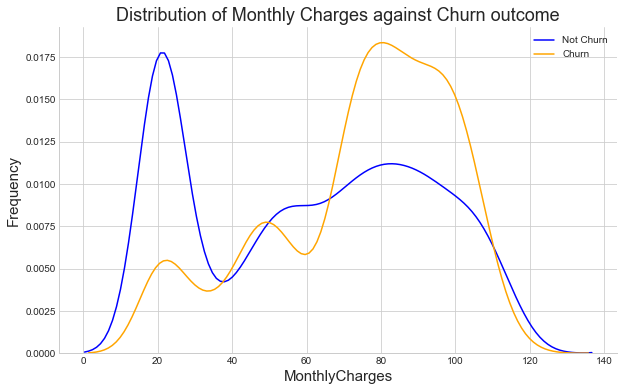

In [367]:
plt.figure(figsize=(10,6))
g = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ], color="Blue")
g = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =g, color="Orange")
g.set_xlabel("MonthlyCharges", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)
plt.title('Distribution of Monthly Charges against Churn outcome', fontsize=18)
g = g.legend(["Not Churn","Churn"])
sns.despine(left=False)

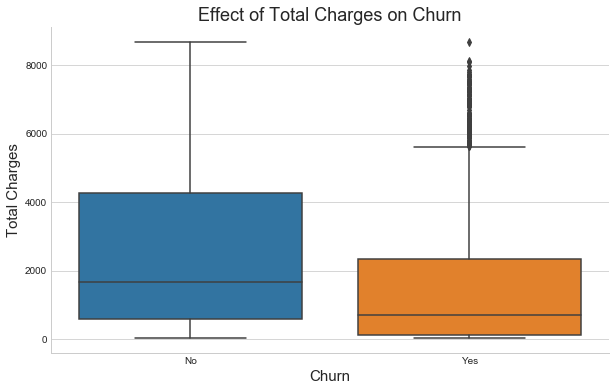

In [368]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Churn', y = 'TotalCharges', data=data)
ax.set_title('Effect of Total Charges on Churn', fontsize=18)
ax.set_ylabel('Total Charges', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
sns.despine(left=False)

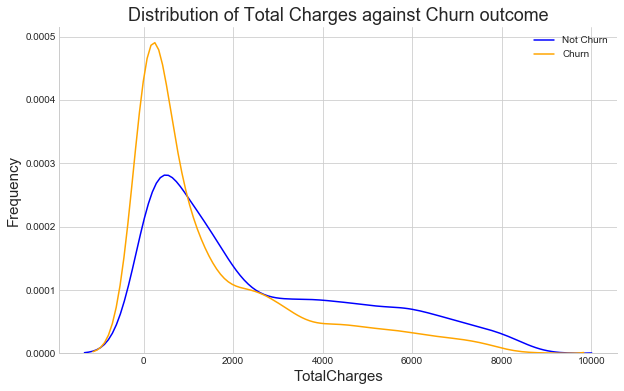

In [369]:
plt.figure(figsize=(10,6))
g = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ], color="Blue")
g = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ], ax =g, color="Orange")
g.set_xlabel("TotalCharges", fontsize = 15)
g.set_ylabel("Frequency", fontsize = 15)
plt.title('Distribution of Total Charges against Churn outcome', fontsize = 18)
g = g.legend(["Not Churn","Churn"])
sns.despine(left=False)

## 3. Feature Selection

### 3.1 Convert all categorical variables into dummy variables 

In [10]:
#dummy variables for those with more than 2 categories
data['SeniorCitizen'] = data['SeniorCitizen'].map(lambda s :1  if s == 'Yes' else 0)
InternetService_dummy = pd.get_dummies(data['InternetService'], prefix = 'InternetService')
Contract_dummy = pd.get_dummies(data['Contract'], prefix = 'Contract')
PaymentMethod_dummy = pd.get_dummies(data['PaymentMethod'], prefix = 'PaymentMethod')
data = data.join([InternetService_dummy, Contract_dummy, PaymentMethod_dummy]) 
data = data.drop(columns=['InternetService', 'Contract', 'PaymentMethod'])
#convert those with yes/no outputs first.
to_binary_features = ['gender', 'Partner','Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for feature in to_binary_features:
    data[feature] = pd.get_dummies(data[feature])

In [11]:
#rearrange the columns
df1 = data.pop('Churn')
data['Churn'] = df1

In [12]:
feature = list(data.columns[1:-1])
target = data.columns[-1]
data_feature = data[feature]
data_target = data[target]

### 3.2 Carry out Chi-squared test to identify insignificant features

In [13]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import plotly.offline as py
py.init_notebook_mode(connected=True)

#fit model with k= 3
select = SelectKBest(score_func = chi2,k = 5)
fit    = select.fit(data_feature,data_target)

feature_scores = pd.DataFrame({"Feature":feature,"Score":fit.scores_,"p_value":fit.pvalues_ })
feature_scores = feature_scores.sort_values(by = "Score" ,ascending =True)

print("Features with p-values that are greater than 0.05: ")
for i, row in feature_scores.iterrows():
    if row.p_value > 0.05:
        print (row.Feature + ": " + str(row.p_value))

Features with p-values that are greater than 0.05: 
gender: 0.6107282754601306
PhoneService: 0.3514409861316786


### 3.3 Identify correlated continuous variables

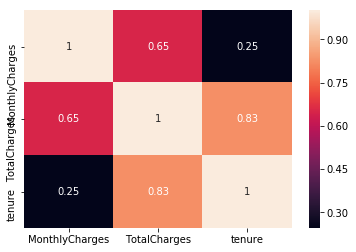

In [14]:
corr = data[['MonthlyCharges', 'TotalCharges', 'tenure']].corr()
sns.heatmap(corr, annot=True)

### 3.4 Plotting of features' importance scores

In [15]:
#creating new label for categorical and numerical columns
feature_scores["type"] = np.where(feature_scores["Feature"].isin(['TotalCharges','tenure', 'MonthlyCharges']),"Numerical","Categorical")

#plot
scatter  = go.Bar(y = feature_scores[feature_scores["type"] == "Categorical"]["Feature"],
                    x = feature_scores[feature_scores["type"] == "Categorical"]["Score"],
                    name = "Categorical", marker = dict(color = "blue",line = dict(width =1)), orientation = 'h'
                   )

bar = go.Bar(x = feature_scores[feature_scores["type"] == "Numerical"]["Feature"],
                y = feature_scores[feature_scores["type"] == "Numerical"]["Score"],name = "Numerical",
                marker = dict(color = "orange",line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0.1, 0.8],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=90),
                        xaxis2=dict(domain=[0.85, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

graphs=[scatter, bar]
fig = go.Figure(data=graphs,layout=layout)
py.iplot(fig)


### 3.5 Drop insignificant features based on Chi-squared test and correlation

In [16]:
data = data.drop(['TotalCharges', 'PhoneService','gender'], axis = 1)

In [17]:
feature = list(data.columns[1:-1])
target = data.columns[-1]
data_feature = data[feature]
data_target = data[target]

## 4. Data Modelling

In [53]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import itertools

### 4.1 Create empty dataframe to store scores and area under curve of each model for comparison

In [54]:
df = pd.DataFrame([], columns=['Model', 'Accuracy Score', 'Cross Validation Score'])

def model_comparison(model, accuracy, cv, df) :
    df2 = pd.DataFrame([[model, accuracy, cv]], columns=['Model', 'Accuracy Score', 'Cross Validation Score'])
    df = df.append(df2, ignore_index=True)
    return df

In [32]:
# to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.grid(False)




### 4.2 Baseline Model using Zero Rule Algorithm

In [55]:
def zero_rule_algorithm_classification(train, test):
    output_values = [row[-1] for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(test))]
    return predicted

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(data_feature, data_target, test_size=0.3, random_state=12345)
zero_algo_train = y_train.astype(str).tolist()
zero_algo_test = y_valid.astype(str).tolist()
predicted = zero_rule_algorithm_classification(zero_algo_train, zero_algo_test)
print("Accuracy of Baseline Model based on Zero Rule Algorithm: " + str(accuracy_metric(zero_algo_test, predicted)) + '%')

Accuracy of Baseline Model based on Zero Rule Algorithm: 72.65402843601896%


In [58]:
#convert all strings in predicted and zero_algo_test to integers
predicted = [int(i) for i in predicted]
zero_algo_test = [int(i) for i in zero_algo_test]

#convert to array
predicted = np.array(predicted)
zero_algo_test = np.array(zero_algo_test)

Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


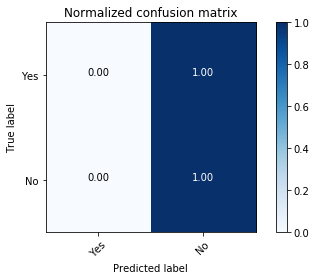

In [59]:
cnf_matrix = confusion_matrix(zero_algo_test, predicted)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Yes", "No"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [60]:
# ROC and AUC
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve later
fpr, tpr, thresholds = roc_curve(zero_algo_test, predicted) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
a_roc_auc = auc(fpr, tpr)

#add into dataframe to compare with other models
df = model_comparison('Baseline Model', accuracy_score(zero_algo_test, predicted)*100, '-', a_roc_auc, df)

### 4.3 Logistic Regression Model

#### Accuracy Score and Confusion Matrix

Accuracy score of Logistic Regression Model: 80.56872037914692%
Normalized confusion matrix
[[0.55 0.45]
 [0.1  0.9 ]]


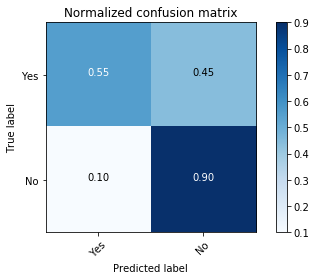

In [61]:
#2. Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=12345)
lr.fit(X=X_train, y=y_train)
y_pred_valid = lr.predict(X_valid)

#Performance of logistic regression model
print("Accuracy score of Logistic Regression Model: " + str(accuracy_score(y_valid, y_pred_valid)*100) + '%')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_valid, y_pred_valid)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Yes", "No"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Cross-validation score

In [62]:
kf = KFold(n_splits = 5, random_state = 12345)
lr = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=12345)
lr_model = cross_val_score(lr, # Cross-validation on model_1
                             data_feature, # Feature matrix
                             data_target, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
score = lr_model.mean()
print("Cross validation score of Logistic Regression Model: " + str(score*100) + '%')

Cross validation score of Logistic Regression Model: 80.20456546772336%


In [63]:
#to plot ROC curve later
lr_fpr, lr_tpr, thresholds = roc_curve(y_valid, y_pred_valid) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
lr_roc_auc = auc(lr_fpr, lr_tpr)

#add into dataframe to compare with other models
df = model_comparison('Logistic Regression Model', accuracy_score(y_valid, y_pred_valid)*100, score*100, df)

### 4.4 Decision Tree Model 

In [65]:
from sklearn.grid_search import GridSearchCV

#### Accuracy Score and Confusion Matrix

{'criterion': 'entropy', 'max_depth': 3}
Accuracy of Decision Tree Classifier: 78.53080568720378%
Normalized confusion matrix
[[0.39 0.61]
 [0.07 0.93]]


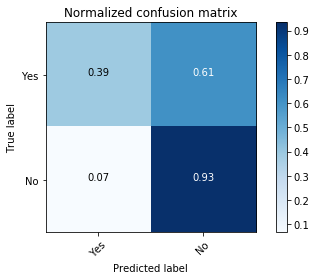

In [66]:
#1. Decision Tree Model

# Single decision tree model
param_grid = {'max_depth': list(range(1, 33)), 'criterion': ['gini', 'entropy']}

DT = GridSearchCV(DecisionTreeClassifier(random_state=12345), param_grid)

# Fit decision tree model
DT_model = DT.fit(X_train, y_train)

print (DT_model.best_params_)

# Validation
y_pred_valid = DT_model.predict(X_valid)
# Performance of Decision Tree Model
print("Accuracy of Decision Tree Classifier: " + str(accuracy_score(y_valid, y_pred_valid)*100) + '%')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_valid, y_pred_valid)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Yes", "No"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Cross-validation score

In [67]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=12345)

# Cross validation on Model 1
DT = cross_val_score(decision_tree, # Cross-validation on Model 1
                             data_feature, # Feature matrix
                             data_target, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
score = DT.mean()
print("Cross validation score of Decision Tree Classifier: " + str(score*100) + '%')

Cross validation score of Decision Tree Classifier: 73.35032822071315%


In [68]:
# to plot the ROC curve later
ent_fpr, ent_tpr, thresholds = roc_curve(y_valid, y_pred_valid) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
ent_roc_auc = auc(ent_fpr, ent_tpr)

#add into dataframe to compare with other models
df = model_comparison('Decision Tree Classifier (Entropy)', accuracy_score(y_valid, y_pred_valid)*100, score*100, df)

### 4.5 Bagging Model 

#### Accuracy Score and Confusion Matrix

{'n_estimators': 800}
Accuracy of Bagging method: 79.14691943127961%
Normalized confusion matrix
[[0.53 0.47]
 [0.11 0.89]]


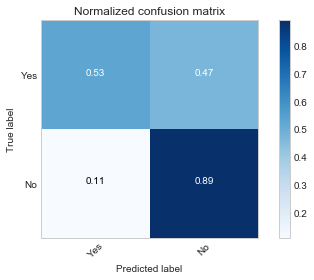

In [494]:
# Bagging method
# Bootstrap Aggregating Package
from sklearn.ensemble import BaggingClassifier

param_grid = {'n_estimators': list(range(200,1001, 100))}
BA = GridSearchCV(BaggingClassifier(random_state=12345), param_grid)

BA_model = BA.fit(X_train, y_train)
print (BA_model.best_params_)
# Validation
y_pred_valid = BA_model.predict(X_valid)

# Performance of Bagging model
print("Accuracy of Bagging method: " + str(accuracy_score(y_valid, y_pred_valid)*100) + '%')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_valid, y_pred_valid)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Yes", "No"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Cross-validation score

In [69]:
BA = BaggingClassifier(n_estimators = 100, random_state=12345)
BA_model = cross_val_score(BA, # Cross-validation on Model 1
                             data_feature, # Feature matrix
                             data_target, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
score = BA_model.mean()
print("Cross validation score of Bagging Model: " + str(score*100) + '%')

Cross validation score of Bagging Model: 78.07155039676643%


In [70]:
# Plot ROC Curve later
bag_fpr, bag_tpr, thresholds = roc_curve(y_valid, y_pred_valid) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
bag_roc_auc = auc(bag_fpr, bag_tpr)
#add into dataframe to compare with other models
df = model_comparison('Bagging Model', accuracy_score(y_valid, y_pred_valid)*100, score*100, df)

### 4.6 Random Forest

#### Accuracy Score and Confusion Matrix

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 600}
Accuracy of Random Forest: 80.61611374407583%
Normalized confusion matrix
[[0.51 0.49]
 [0.08 0.92]]


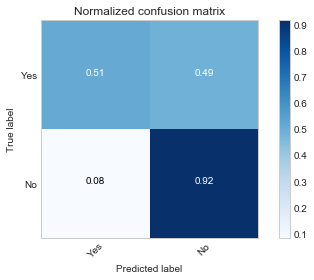

In [498]:
# Random Forest package
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': list(range(1, 33)), 
              'n_estimators': list(range(200, 1001, 100)),
                'criterion': ['gini', 'entropy']}
RF = GridSearchCV(RandomForestClassifier(random_state=12345, max_features = "sqrt"), param_grid)

RF_model = RF.fit(X_train, y_train)
RF_model.classes_

print(RF_model.best_params_)
#Validation
y_pred_valid = RF_model.predict(X_valid)

#Performance of Random Forest Model
print("Accuracy of Random Forest: " + str(accuracy_score(y_valid, y_pred_valid)*100) + '%') 
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_valid, y_pred_valid)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Yes", "No"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Cross-validation score

In [71]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)

RF = cross_val_score(random_forest, # Cross-validation on Model 1
                             data_feature, # Feature matrix
                             data_target, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
score = RF.mean()
print("Cross validation score of Random Forest Model: " + str(score*100) + '%')

Cross validation score of Random Forest Model: 77.97205801919078%


In [72]:
# Plot ROC Curve later
rf_fpr, rf_tpr, thresholds = roc_curve(y_valid, y_pred_valid) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
rf_roc_auc = auc(rf_fpr, rf_tpr)

#add into dataframe to compare with other models
df = model_comparison('Random Forest Model',accuracy_score(y_valid, y_pred_valid)*100, score*100,df)

### 4.7 Adaboost 

#### Accuracy Score and Confusion Matrix

{'n_estimators': 200}
Accuracy of Adaboost model: 80.90047393364928%
Normalized confusion matrix
[[0.55 0.45]
 [0.09 0.91]]


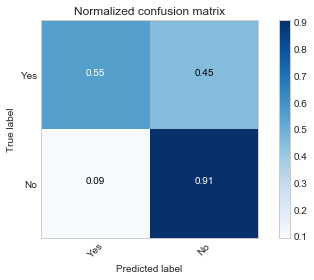

In [500]:
# AdaBoost package
from sklearn.ensemble import AdaBoostClassifier

# Fit Adaboosting Model
param_grid = {'n_estimators': list(range(200, 1001, 100))}
Ada = GridSearchCV(AdaBoostClassifier(random_state=12345), param_grid)

Ada_model = Ada.fit(X = X_train, y = y_train)

print(Ada_model.best_params_)
# Validation
y_pred_valid = Ada_model.predict(X_valid)

# Performance of Adaboosting model
print("Accuracy of Adaboost model: " + str(accuracy_score(y_valid, y_pred_valid)*100) + '%')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_valid, y_pred_valid)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Yes", "No"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [73]:
Adaboost = AdaBoostClassifier(n_estimators=100, random_state=12345)

# Cross validation on Model 4
Ada = cross_val_score(Adaboost, # Cross-validation on Model 2
                             data_feature, # Feature matrix
                             data_target, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
score = Ada.mean()
print("Cross validation score of Adaboost Model: " + str(score*100) + '%')

Cross validation score of Adaboost Model: 80.21886098869602%


In [74]:
# Plot ROC Curve later
ada_fpr, ada_tpr, thresholds = roc_curve(y_valid, y_pred_valid) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
ada_roc_auc = auc(ada_fpr, ada_tpr)

#add into dataframe to compare with other models
df = model_comparison('Adaboost Model', accuracy_score(y_valid, y_pred_valid)*100, score*100,df)

### 4.8 Comparison of Models' performance

In [78]:
df

,Model,Accuracy Score,Cross Validation Score
0,Baseline Model,72.654028,-
1,Logistic Regression Model,80.568720,80.2046
2,Decision Tree Classifier (Entropy),78.530806,73.3503
3,Bagging Model,79.146919,78.0716
4,Random Forest Model,80.616114,77.9721
5,Adaboost Model,80.900474,80.2189


### 4.9 ROC Curves of Models

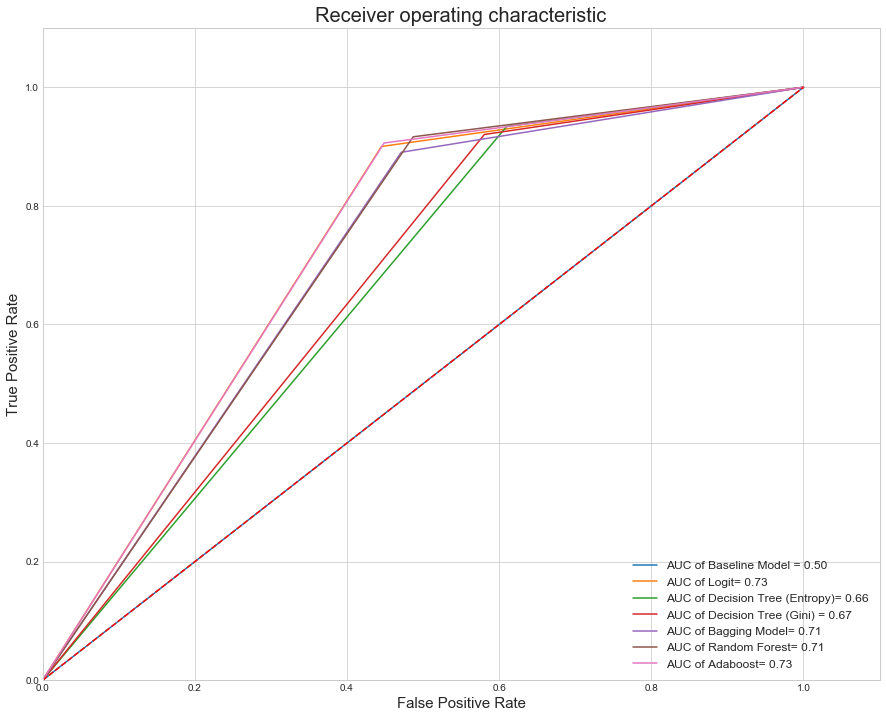

In [569]:
plt.figure(figsize=(15,12))

plt.plot(fpr, tpr, label='AUC of Baseline Model = %0.2f'% a_roc_auc)
plt.plot(lr_fpr, lr_tpr, label='AUC of Logit= %0.2f'% lr_roc_auc)
plt.plot(ent_fpr, ent_tpr, label='AUC of Decision Tree (Entropy)= %0.2f'% ent_roc_auc)
plt.plot(gini_fpr, gini_tpr, label='AUC of Decision Tree (Gini) = %0.2f'% gini_roc_auc)
plt.plot(bag_fpr, bag_tpr, label='AUC of Bagging Model= %0.2f'% bag_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='AUC of Random Forest= %0.2f'% rf_roc_auc)
plt.plot(ada_fpr, ada_tpr, label='AUC of Adaboost= %0.2f'% ada_roc_auc)
plt.legend(loc='lower right', fontsize=12)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.title('Receiver operating characteristic', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.show()